In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
im = plt.imread(r"/home/rahul/WSL_Projects/ReferencesPython/Convolutional Neural Networks/Image_Processing/bird.png")
type(im)


numpy.ndarray

Image has an additional 4th channel which is not necessary

(<matplotlib.image.AxesImage at 0x7fcdde395960>, (1440, 2560, 4))

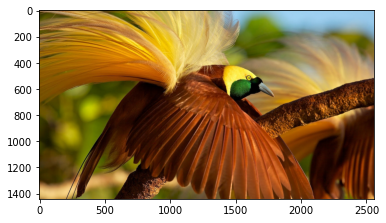

In [3]:
plt.imshow(im) , im.shape

(<matplotlib.image.AxesImage at 0x7fcdde2f05b0>, (1440, 2560, 3))

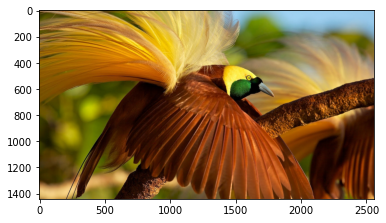

In [4]:
im2 = im[:,:,:3]
plt.imshow(im2) , im2.shape

In [5]:
R,G,B = im2[:,:,0],im2[:,:,1],im2[:,:,2] # Seperate out the Colour Channels

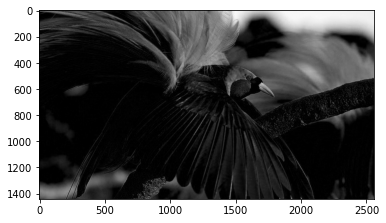

In [6]:
plt.imshow(B, cmap="gray") #Different types of colour maps

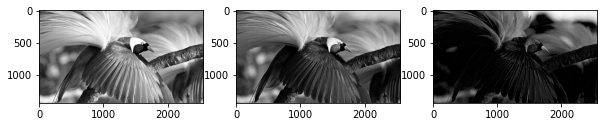

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,15))
ax1.imshow(R,cmap = "gray")
ax2.imshow(G,cmap = "gray")
ax3.imshow(B,cmap = "gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


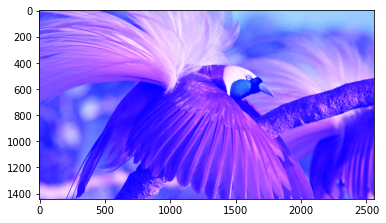

In [8]:
im3 = im2.copy()
im3[:,:,2] = 255
plt.imshow(im3)

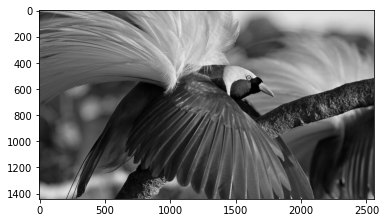

In [9]:
imGray = (R + B + G)/3
plt.imshow(imGray,cmap="gray")

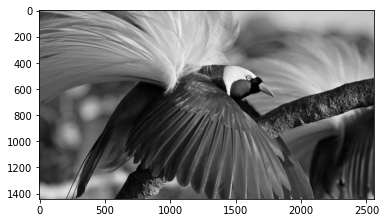

In [10]:
imGray = R * 0.2989 + G * 0.5870 + B * 0.1140 
plt.imshow(imGray,cmap="gray")

In [11]:
import cv2
imGrayCV2 = cv2.cvtColor(im2,cv2.COLOR_RGB2GRAY)

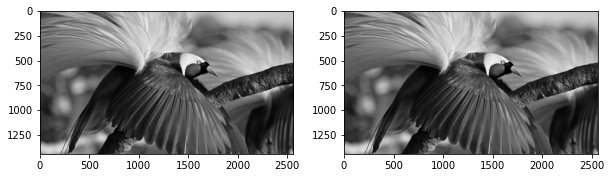

In [12]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,15))
ax1.imshow(imGray, cmap="gray")
ax2.imshow(imGrayCV2, cmap="gray")

# Blurring, Edge Detection and Sharpening Images

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

In [14]:
im = plt.imread(r"/home/rahul/WSL_Projects/ReferencesPython/Convolutional Neural Networks/Image_Processing/bird.png")[:,:,:3]

In [15]:
imGray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)

In [16]:
smoothingMask = np.ones((15,15))/225

In [17]:
imBlurred = signal.convolve2d(imGray,smoothingMask,
                              boundary='symm',mode='same')

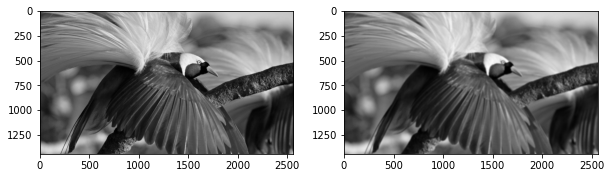

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,15))
ax1.imshow(imGray, cmap="gray")
ax2.imshow(imBlurred, cmap="gray")

In [19]:
xMask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) #HORIZONTAL EDGES
yMask = xMask.T.copy() #VERTICAL EDGES

In [20]:
fx = signal.convolve2d(imGray,xMask,
                              boundary='symm',mode='same')
fy = signal.convolve2d(imGray,yMask,
                              boundary='symm',mode='same')

In [21]:
fx.shape, imGray.shape

((1440, 2560), (1440, 2560))

In [22]:
Gm = (fx**2 + fy**2)**0.5 #Gradient Magnitude

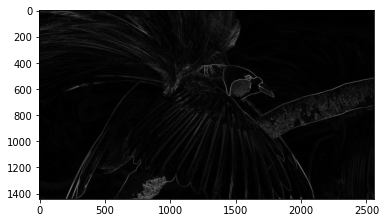

In [23]:
plt.imshow(Gm, cmap='gray')

In [24]:
th = Gm.max()-16*Gm.std() #create a threshold value
th

0.300376992974269

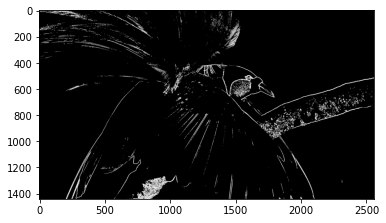

In [25]:
E = Gm>th
plt.imshow(E,cmap='gray')

In [26]:
Gm = (fx**2 + fy**2)**0.5 #Gradient Magnitude
imSharped = imBlurred + 0.5*Gm #highlight edges

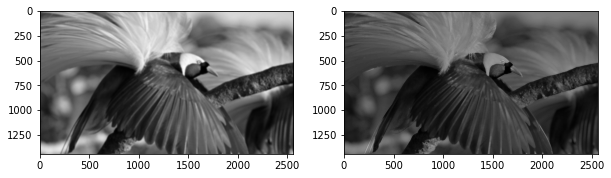

In [27]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,15))
ax1.imshow(imBlurred, cmap="gray")
ax2.imshow(imSharped, cmap="gray")

# Lets create our Own Conv2D function

In [35]:
import numpy as np

In [54]:
def f_conv2D(image,mask):
    assert(image.ndim==2) #check image is 2dimensional
    assert(mask.ndim==2)

    imageColumns = image.shape[1]
    imageRows = image.shape[0]

    KernelColumns = mask.shape[1]
    KernelRows = mask.shape[0]

    newRows = imageRows + KernelRows - 1  #new image will have one less row
    newColumns = imageColumns + KernelColumns - 1 #new image will have one less column

    Y = np.zeros((newRows,newColumns)) #Create Custom Image

    for m in range(newRows):
        for n in range(newColumns):

            for i in range(KernelRows):
                for j in range(KernelColumns):
                    if(m-i>0) and (m-i<imageRows) and (n-j>0) and (n-j< imageColumns): #maintain loop in index
                        Y[m,n] = Y[m,n] + mask[i,j]*image[m-i,n-j]

    return Y

In [48]:
kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
image = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [55]:
f_conv2D(image, kernel) #the loop will take too long if we use a normal image

array([[  0.,   0.,   0.,   0.,   0.],
       [  0.,  -5., -16., -17.,  -6.],
       [  0.,  -8., -25., -26.,  -9.],
       [  0.,   5.,  16.,  17.,   6.],
       [  0.,   8.,  25.,  26.,   9.]])